### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [7]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
#the -1 is the last column and 0 is the first column
df.drop([df.columns[-1],df.columns[0]],axis=1,inplace=True)
print(df.head())

     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

**Answer to Exercise 1(b): Explanation of the `pairplot` Function**

- **`import matplotlib.pyplot as plt`** - Imports the plotting library that provides all drawing functions

- **`def pairplot(df, figsize=None):`** - Defines the function with DataFrame input and optional figure size

- **`if figsize is None: figsize = (7.10, 6.70)`** - Sets default size if none provided; controls overall plot dimensions

- **`n_vars = df.shape[1]`** - Counts number of columns (variables); determines grid will be n_vars × n_vars

- **`fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)`** - Creates grid of n_vars² subplots arranged in square format

- **`plt.subplots_adjust(wspace=0.10, hspace=0.10, ...)`** - Adjusts spacing between subplots and margins; prevents overlap and improves readability

- **`for i in range(n_vars): for j in range(n_vars):`** - Double loop fills every position in the grid; iterates through all n_vars² cells

- **`axij = ax[i][j]`** - Selects current subplot at position (row i, column j); all following commands apply only to this subplot

- **`i_name = df.columns[i]` and `j_name = df.columns[j]`** - Gets variable names for indices i and j; used to extract correct data

- **`axij.set_xticks([])` and `axij.set_yticks([])`** - Removes axis tick marks and labels; reduces clutter in small subplots

- **`axij.margins(0.1)`** - Adds 10% padding around data points on both axes; prevents points from touching edges

- **`if i != j: axij.scatter(df[i_name], df[j_name], s=10)`** - Off-diagonal cells: creates scatterplot showing relationship between two variables; s=10 sets small marker size

- **`else: axij.text(0.5, 0.5, i_name, ...)`** - Diagonal cells: displays variable name centered; serves as index/legend

- **`return fig, ax`** - Returns figure and axes objects; allows further customization outside the function

- **`fig, ax = pairplot(df)` and `plt.show()`** - Calls function and displays the complete pairplot on screen

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

**Answer to Exercise 1(c):**

From the pairplot, the predictors that look most correlated with `lcavol` are **`lpsa`** (clearly the strongest), then **`lcp`**, and **`lweight`** (weaker but still positive).

**Inferred datatypes (from the point patterns):**

- **Continuous:** `lweight`, `lbph`, `lcp`, `lpsa`
- **Binary (0/1):** `svi`
- **Discrete/ordinal:** `age`, `gleason`, `pgg45`

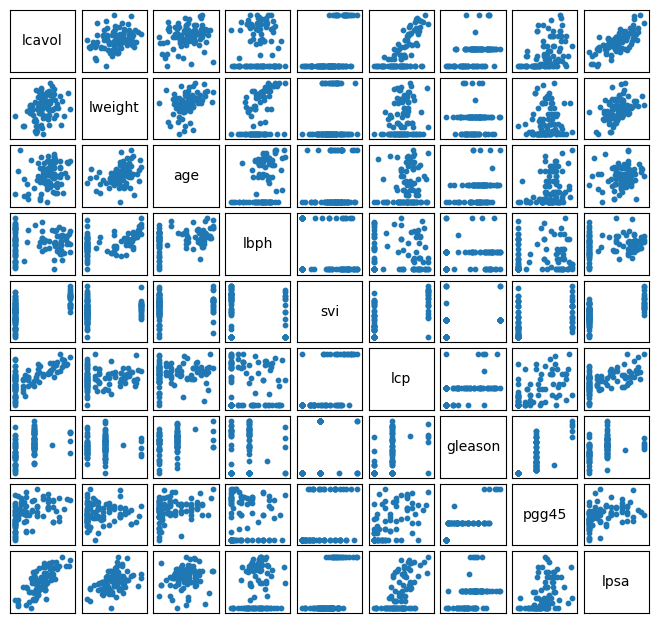

'\nlcavol : continuous value\nlweight : continuous value\nage : int \nlbph : continuous value\nsvi : binar value\nlcp : continuous value\ngleason : three possible values (categorical)\npgg45 : int values\nlpsa : continuous values\n'

In [23]:
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    
    #Create a figure wich will contain all our plots in a format of matrix of length the number of columns of DataFrames
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    
    #Define the space taken by each subplot
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    
    for i in range(n_vars):
        for j in range(n_vars):
            #Select plots at line i and colums j in the matrix
            axij = ax[i][j]
            
            #Select i-th colum and j-th column of the DataFrame
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                #If i and j are different we plot values on a scatterpoints format
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                #Else we display a text representing the name of the column
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

# lpsa seems to be the variables the most correlated with lcavol 

# Predictors data type
"""
lcavol : continuous value
lweight : continuous value
age : int 
lbph : continuous value
svi : binar value
lcp : continuous value
gleason : three possible values (categorical)
pgg45 : int values
lpsa : continuous values
"""

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

**Answer to Exercise 1(d): Correlation Formula and Implementation**

**Pearson Correlation Formula:**

For two vectors $x, y \in \mathbb{R}^n$:

$$\rho(x, y) = \frac{\sum_{k=1}^{n}(x_k - \bar{x})(y_k - \bar{y})}{\sqrt{\sum_{k=1}^{n}(x_k - \bar{x})^2} \cdot \sqrt{\sum_{k=1}^{n}(y_k - \bar{y})^2}}$$

**Differences from `df.corr()`:**

- **NaN handling:** `df.corr()` uses pairwise deletion; different handling leads to different results
- **Constant columns:** if variance = 0, correlation is undefined (NaN); must handle division by zero
- **Type coercion:** `df.corr()` ignores non-numeric columns
- **Method choice:** `df.corr()` defaults to Pearson but can compute Spearman or Kendall
- **Numeric precision:** tiny rounding differences from float operations

**Modified pairplot showing correlations in upper triangle:**

- **Lower triangle** ($i > j$): scatterplot
- **Diagonal** ($i = j$): variable name
- **Upper triangle** ($i < j$): correlation coefficient

corr_np(lpsa, lcavol) = 0.734460
pandas corr          = 0.734460


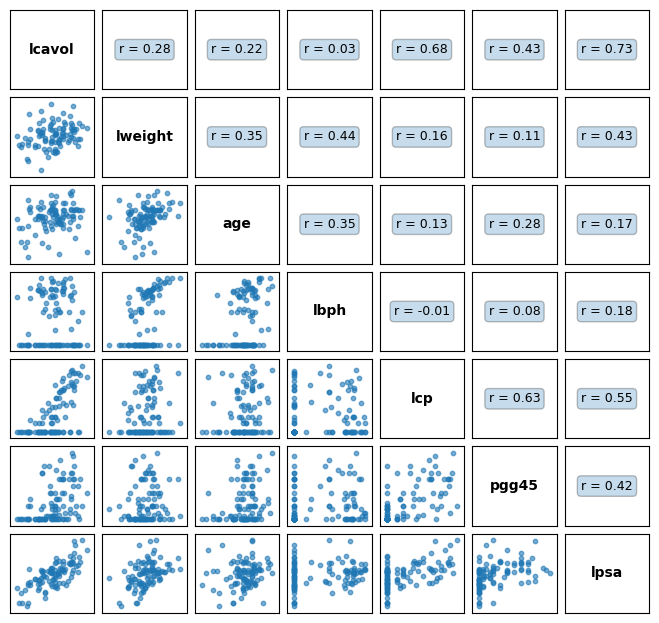

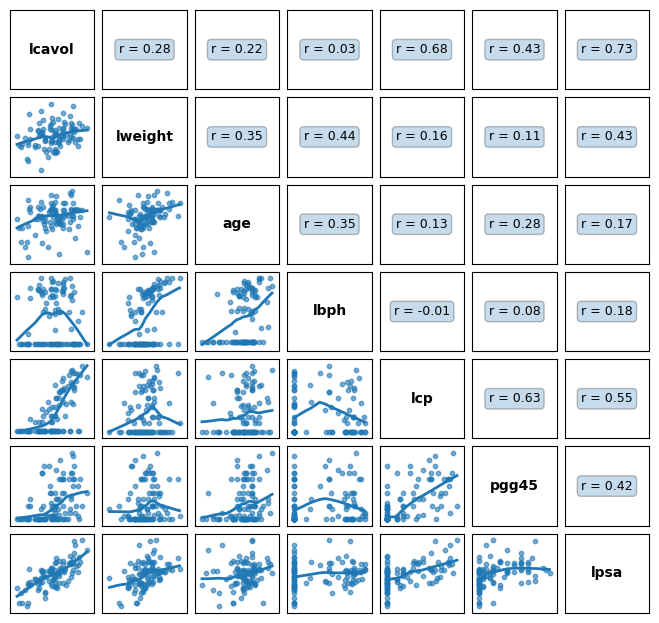

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# ---------------------------------------------------------------------
# Pearson correlation "from scratch" (handles NaNs, returns NaN if constant)
# ---------------------------------------------------------------------
def corr_np(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]

    if x.size == 0:
        return np.nan

    x = x - x.mean()
    y = y - y.mean()

    denom = np.sqrt((x**2).sum()) * np.sqrt((y**2).sum())
    return np.nan if denom == 0 else (x * y).sum() / denom


# Quick sanity check: NumPy vs pandas
r_np = corr_np(df["lpsa"], df["lcavol"])
r_pd = df["lpsa"].corr(df["lcavol"])
print(f"corr_np(lpsa, lcavol) = {r_np:.6f}")
print(f"pandas corr          = {r_pd:.6f}")


# ---------------------------------------------------------------------
# Pairplot: same structure as the original one, just with 2 changes:
# - upper triangle: show correlation coefficient
# - lower triangle: scatter (optional LOWESS)
# ---------------------------------------------------------------------
def pairplot(df, figsize=None, show_corr=True, show_lowess=False, frac=0.6):
    if figsize is None:
        figsize = (7.10, 6.70)

    # keep only numeric columns (like df.corr())
    df = df.select_dtypes(include=[np.number])

    n_vars = df.shape[1]
    cols = df.columns

    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)

    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = cols[i]
            j_name = cols[j]

            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)

            # --- diagonal: variable name (same as original) ---
            if i == j:
                axij.text(
                    0.5, 0.5, i_name,
                    fontsize=10, weight="bold",
                    ha="center", va="center",
                    transform=axij.transAxes
                )

            # --- upper triangle: correlation (new) ---
            elif show_corr and i < j:
                r = corr_np(df[i_name], df[j_name])
                axij.text(
                    0.5, 0.5, f"r = {r:.2f}",
                    fontsize=9,
                    ha="center", va="center",
                    transform=axij.transAxes,
                    bbox=dict(boxstyle="round", alpha=0.25)
                )

            # --- lower triangle: scatter (same as original idea) ---
            else:
                x = df[j_name].to_numpy(dtype=float)
                y = df[i_name].to_numpy(dtype=float)
                mask = np.isfinite(x) & np.isfinite(y)
                x, y = x[mask], y[mask]

                axij.scatter(x, y, s=10, alpha=0.6)

                # optional LOWESS trend line (bonus)
                if show_lowess and x.size >= 5:
                    order = np.argsort(x)
                    sm = lowess(y[order], x[order], frac=frac, return_sorted=True)
                    axij.plot(sm[:, 0], sm[:, 1], linewidth=2)

    return fig, ax


# Correlation in upper triangle
fig, ax = pairplot(df, show_corr=True, show_lowess=False)
plt.show()

# Bonus: add LOWESS trend lines on the scatter panels
fig, ax = pairplot(df, show_corr=True, show_lowess=True, frac=0.6)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

**Answer to Exercise 2(a): Multiple Linear Regression Model**

**General Mathematical Equation:**

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \varepsilon$$

**Specific Equation for the Prostate Cancer Model:**

$$\text{lcavol} = \beta_0 + \beta_1 \text{lweight} + \beta_2 \text{age} + \beta_3 \text{lbph} + \beta_4 \text{lcp} + \beta_5 \text{pgg45} + \beta_6 \text{svi} + \beta_7 \text{gleason} + \varepsilon$$

**Parameter Definitions:**

- **$\beta_0$** : intercept

- **$\beta_1, \ldots, \beta_7$** : coefficients

- **$\varepsilon$** : error term (often $E[\varepsilon] = 0$, $\text{Var}(\varepsilon) = \sigma^2$)

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

**Answer to Exercise 2(b): One-Hot Encoding Explanation**

**Why `dtype=np.float64` in `pd.get_dummies`?**

To make sure every dummy column is plain numeric (floats). Then X is a clean numeric matrix and regression/matrix ops won't complain about bool/object types.

**Why drop `svi_0` and `gleason_6`?**

One dummy per category is redundant once you also have an intercept (dummy trap). Dropping one level sets the reference group (svi=0, gleason=6) and avoids perfect multicollinearity.

**Why add a column of ones?**

That's just to fit the intercept $\beta_0$ — the baseline value of lcavol when predictors are zero.

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [35]:
import statsmodels.api as sm

# Convert categorical variables
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

# Encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)

# Drop one dummy column for each categorical predictor (reference groups)
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])

# Add intercept column
df_enc['intercept'] = 1

# Extract predictors and target
X = df_enc.drop(columns=['lcavol'])
y = df['lcavol']

# Fit OLS model
model = sm.OLS(y, X)
results = model.fit()

# Display summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        17:37:16   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.9

**Answer to Exercise 2(c): Regression Analysis and Interpretation**

**Coefficients for `svi` and `gleason`:**

We dropped `svi_0` and `gleason_6`, so they are the reference levels.

- **`svi_1`** estimates the change in lcavol for svi=1 vs svi=0, all else equal: $\hat{\beta} = -0.220$, p=0.392 → not significant.

- Each **`gleason_k`** estimates the change in lcavol for gleason=k vs gleason=6, ceteris paribus:
  - gleason_7: p=0.151 → not significant
  - gleason_8: p=0.352 → not significant  
  - gleason_9: p=0.109 → not significant
  
  None are significant at the 5% level.

**If we didn't one-hot encode:**

OLS can't use raw categorical columns directly (or it would wrongly treat them as numeric), and keeping all dummies + intercept would create the **dummy trap** → $X^T X$ becomes singular and the regression matrix cannot be inverted.

**Overall regression results:**

The model is globally significant (Prob(F) = $9.05 \times 10^{-18}$). The main significant predictors are:
- **`lpsa`** and **`lcp`** (both p < 0.001) — very strong effects
- **`age`** (p = 0.030) — moderate effect
- **`pgg45`** (p = 0.040) — moderate effect

The `svi` and `gleason` dummies are **not significant** once the other variables are included, suggesting their effects are captured by the continuous predictors (especially lcp which relates to disease progression).

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [39]:
conf_int = results.conf_int(alpha=0.05)
conf_int.columns = ['Lower', 'Upper']
print("95% Confidence Intervals for Coefficients:")
print(conf_int)
print("\n")

conf_int['Contains_Zero'] = (conf_int['Lower'] <= 0) & (conf_int['Upper'] >= 0)
print("Coefficients with CI containing zero (non-significant at 5%):")
print(conf_int[conf_int['Contains_Zero']])

95% Confidence Intervals for Coefficients:
              Lower     Upper
lweight   -0.431600  0.409107
age        0.002436  0.047129
lbph      -0.219914  0.011515
lcp        0.233639  0.571880
pgg45     -0.018469 -0.000419
lpsa       0.370474  0.728673
svi_1     -0.730029  0.289190
gleason_7 -0.116263  0.739616
gleason_8 -2.219087  0.797911
gleason_9 -0.179004  1.759273
intercept -3.145013  0.331705


Coefficients with CI containing zero (non-significant at 5%):
              Lower     Upper  Contains_Zero
lweight   -0.431600  0.409107           True
lbph      -0.219914  0.011515           True
svi_1     -0.730029  0.289190           True
gleason_7 -0.116263  0.739616           True
gleason_8 -2.219087  0.797911           True
gleason_9 -0.179004  1.759273           True
intercept -3.145013  0.331705           True


Some of the predictors are not significant for a confidence intervals of level 95%, so a model with only the three predictors : **age** , **lcp** and **lpsa** could be the better that the actual one.

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [43]:
# Get p-values for all coefficients
pvalues = results.pvalues
print("P-values for all coefficients:")
print(pvalues)
print("\n")

# Focus on lpsa
lpsa_pval = pvalues['lpsa']
lpsa_coef = results.params['lpsa']
lpsa_conf_lower, lpsa_conf_upper = results.conf_int().loc['lpsa']

print("=" * 60)
print("ANALYSIS OF lpsa VARIABLE")
print("=" * 60)
print(f"Coefficient: β_lpsa = {lpsa_coef:.4f}")
print(f"P-value: {lpsa_pval:.2e}")
print(f"95% CI: [{lpsa_conf_lower:.4f}, {lpsa_conf_upper:.4f}]")
print(f"Contains zero: {lpsa_conf_lower <= 0 <= lpsa_conf_upper}")
print("\nInterpretation:")
print(f"- The p-value ({lpsa_pval:.2e}) << 0.05 → HIGHLY SIGNIFICANT")
print(f"- The 95% CI does NOT contain zero → coefficient is significant")
print(f"- Effect: A 1-unit increase in lpsa increases lcavol by ~{lpsa_coef:.4f} units")
print(f"- Conclusion: lpsa is the STRONGEST predictor in the model")

P-values for all coefficients:
lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64


ANALYSIS OF lpsa VARIABLE
Coefficient: β_lpsa = 0.5496
P-value: 2.94e-08
95% CI: [0.3705, 0.7287]
Contains zero: False

Interpretation:
- The p-value (2.94e-08) << 0.05 → HIGHLY SIGNIFICANT
- The 95% CI does NOT contain zero → coefficient is significant
- Effect: A 1-unit increase in lpsa increases lcavol by ~0.5496 units
- Conclusion: lpsa is the STRONGEST predictor in the model


**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

**Bonus response**: `mpy.linalg.inv` resolve the problem by calculating the inverse matrix (using a LU decomposition) of the predictors and then use it to find the parameters by making matrix multiplication what is very long in term of time compared to `mpy.linalg.solve` that resole directly the parameters (using LU decomposition). Then the LU decomposition use approximations, and the fact of multiplicate matrixes that are based on approximations generate bigger approximations and results that are not good enough.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

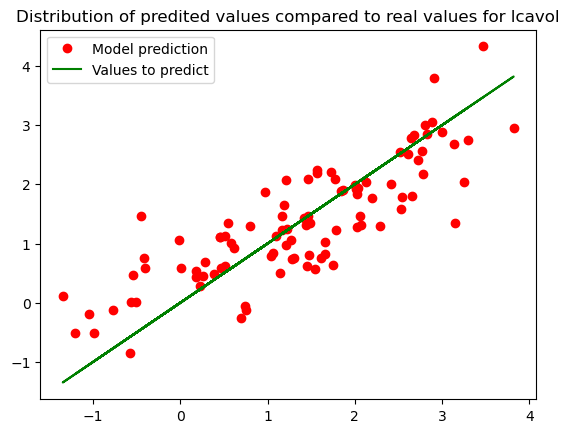

In [89]:
predictedValues = results.get_prediction(df_enc.drop(columns=['lcavol'])).predicted_mean
#plt.plot(df['lcavol'],'o', color='green')
plt.plot(df['lcavol'].values,predictedValues,'o', color='red', label='Model prediction')
plt.plot(df['lcavol'].values,df['lcavol'].values, color='green', label='Values to predict')
plt.title("Distribution of predited values compared to real values for lcavol")
plt.legend()


**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        18:18:19   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

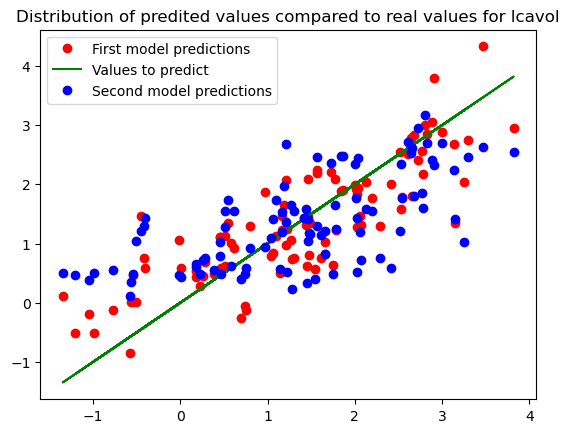

In [99]:
# Add intercept column
df_enc2 = df_enc.drop(columns=['lpsa','lcp'])
                     
# Extract predictors and target
X = df_enc2.drop(columns=['lcavol'])
y = df['lcavol']

# Fit OLS model
model2 = sm.OLS(y, X)
results2 = model2.fit()

# Display summary
print(results2.summary())

#Plot the new predictions to compare them to the results of the old model
predictedValues2 = results2.get_prediction(df_enc2.drop(columns=['lcavol'])).predicted_mean
plt.plot(df['lcavol'].values,predictedValues,'o', color='red', label='First model predictions')
plt.plot(df['lcavol'].values,df['lcavol'].values, color='green', label='Values to predict')
plt.plot(df['lcavol'].values,predictedValues2,'o', color='blue', label='Second model predictions')
plt.title("Distribution of predited values compared to real values for lcavol")
plt.legend()

With these two predictors, the model that results has `svi_1` and `gleason_7` as more significant predictors. We can see on the chart that the predictions of this second model are clearly worse than the ones of the first model.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

Response for quesrion (a)
The best model for 2 predictors is a model with  ['lcp', 'lpsa']  with a RSS of : 47.27809728978648

 
 Response for quesrion (b)
The best model for  0  predictors is a model with  []  with a RSS of : 133.35903388922304
The best model for  1  predictors is a model with  ['lpsa']  with a RSS of : 61.420907416789916
The best model for  2  predictors is a model with  ['lcp', 'lpsa']  with a RSS of : 47.27809728978648
The best model for  3  predictors is a model with  ['age', 'lcp', 'lpsa']  with a RSS of : 46.237825150928
The best model for  4  predictors is a model with  ['age', 'lbph', 'lcp', 'lpsa']  with a RSS of : 44.87840603234042
The best model for  5  predictors is a model with  ['age', 'lbph', 'lcp', 'pgg45', 'lpsa']  with a RSS of : 44.311332487318964
The best model for  6  predictors is a model with  ['age', 'lbph', 'lcp', 'gleason', 'pgg45', 'lpsa']  with a RSS of : 43.35425154086898
The best model for  7  predictors is a model with  ['age', 'lbph', '

Text(0.5, 1.0, 'RSS in function of the size of model')

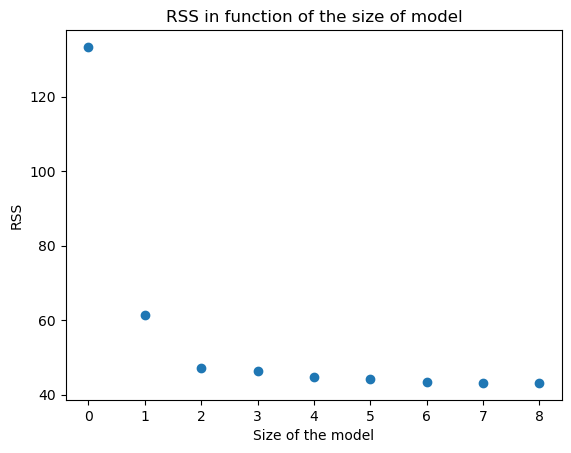

In [18]:
import itertools

def find_best_rss(n):
    if n== 0:
        results = sm.OLS(df['lcavol'], pd.Series(1, index=df.index)).fit()
        return ([],results.ssr)
    min_model = None
    dt = df.drop(columns = 'lcavol')
    for x in itertools.combinations(dt.columns, n):
        combin = [x[i] for i in range(n)]
        dp = dt[combin].copy()
        dp['intercept'] = 1
        model = sm.OLS(df['lcavol'], dp)
        results = model.fit()
        if min_model == None:
            min_model = (combin, results.ssr)
        else:
            if results.ssr < min_model[1]:
                min_model = (combin, results.ssr)
    return min_model

modelsDic = {}
min_model = find_best_rss(2)
print("Response for quesrion (a)")
print ("The best model for 2 predictors is a model with ", min_model[0]," with a RSS of :", min_model[1])

print("\n \n Response for quesrion (b)")
X = [k for k in range(0,9)]
Y =[]
for x in X:
    min_model = find_best_rss(x)
    modelsDic[x] = min_model[0]
    print("The best model for ",x," predictors is a model with ", min_model[0]," with a RSS of :", min_model[1])
    Y.append(min_model[1])
plt.plot(X,Y,'o')
plt.xlabel("Size of the model")
plt.ylabel("RSS")
plt.title('RSS in function of the size of model')


We can remark that the for the model of size 3, the three predictors which create the best model are three predictors that we found to be significant during the question 2(d).


**Response (c)** : The residual sum of squares will always decrease with the increase of the size of the model. But not all the predictors of a model have an important coefficient or are statically significant. The difference of residual sum of square between the best model of size 7 and the model 8 epitomizes this effect because the add of the **lweight** predictor do not change the RSS a lot. So we should do statisical inference on the model of size 8 to check if all the predictors are really significant. Then some predictors may be to correlated betweeen them and one could be deleted.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

**Response (a)** :

In [68]:
from sklearn.model_selection import train_test_split

dp = df.drop(columns = 'lcavol')
X_train, X_valid, Y_train, Y_valid = train_test_split(dp,df['lcavol'],test_size = 0.3)

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.